# Semi-supervised Learning example

* How to prepare and execute SSL experiments
* ```ClusterAndLabelClassifier``` is a SSL algorithm implemented in MOA

**Notebook last updated on 17/02/2024**

In [1]:
# imports from the library. 
from capymoa.stream import stream_from_file
from capymoa.learner import MOAClassifierSSL
from capymoa.evaluation.visualization import plot_windowed_results
from capymoa.evaluation import prequential_SSL_evaluation

capymoa_root: /home/antonlee/github.com/tachyonicClock/MOABridge/src/capymoa
MOA jar path location (config.ini): /home/antonlee/github.com/tachyonicClock/MOABridge/src/capymoa/jar/moa.jar
JVM Location (system): 
JAVA_HOME: /usr/lib/jvm/java-17-openjdk
JVM args: ['-Xmx8g', '-Xss10M']


Sucessfully started the JVM and added MOA jar to the class path


In [2]:
from capymoa.datasets import RBFm_100k
# Capymoa has a number of datasets built into the library. They automatically download when called.
# It is simple to use your own datasets as well using `stream_from_file`
stream = RBFm_100k()

{'learner': 'ClusterAndLabelClassifier',
 'cumulative': <capymoa.evaluation.evaluation.ClassificationEvaluator at 0x7f7941ebfac0>,
 'windowed': <capymoa.evaluation.evaluation.ClassificationWindowedEvaluator at 0x7f7941ef0f10>,
 'wallclock': 19.914543628692627,
 'cpu_time': 30.10683719,
 'max_instances': -1,
 'stream': <capymoa.datasets.datasets.RBFm_100k at 0x7f797f1b6140>,
 'other_measurements': {'num_unlabeled_instances': 99015.0,
  'pseudo_label_accuracy': 0.28931,
  'num_correct_pseudo_labeled': 28931.0,
  'num_instances_tested': 100000.0}}

28.954


,classified instances,classifications correct (percent),Kappa Statistic (percent),Kappa Temporal Statistic (percent),Kappa M Statistic (percent),F1 Score (percent),F1 Score for class 0 (percent),F1 Score for class 1 (percent),F1 Score for class 2 (percent),F1 Score for class 3 (percent),...,Precision for class 1 (percent),Precision for class 2 (percent),Precision for class 3 (percent),Precision for class 4 (percent),Recall (percent),Recall for class 0 (percent),Recall for class 1 (percent),Recall for class 2 (percent),Recall for class 3 (percent),Recall for class 4 (percent)
0,1000.0,24.2,0.192242,2.067183,-10.334789,20.338638,39.422260,4.545455,1.176471,6.024096,...,44.444444,25.000000,8.474576,0.000000,20.094103,92.800000,2.395210,0.602410,4.672897,0.000000
1,2000.0,24.4,2.824141,2.451613,-11.176471,25.375592,33.493976,13.636364,38.431373,8.000000,...,24.590164,64.473684,6.451613,24.800000,22.659477,56.275304,9.433962,27.374302,10.526316,9.687500
2,3000.0,30.2,8.743139,8.877285,0.569801,25.465537,42.726081,14.096916,35.483871,NaN,...,29.090909,33.333333,0.000000,30.158730,26.006550,63.671875,9.302326,37.931034,0.000000,19.127517
3,4000.0,30.1,9.884590,7.783641,0.000000,26.197790,44.444444,27.777778,22.551929,3.603604,...,30.303030,25.000000,3.200000,35.064935,26.017828,52.873563,25.641026,20.540541,4.123711,26.910299
4,5000.0,28.3,8.987746,8.429119,1.510989,25.163860,48.120301,28.423773,27.760252,5.194805,...,25.000000,39.639640,4.545455,14.062500,25.894322,62.500000,32.934132,21.359223,6.060606,6.617647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96000.0,30.8,11.006628,9.778357,1.283880,29.514624,34.309623,40.625000,10.610080,24.074074,...,41.935484,11.235955,22.608696,37.096774,29.678813,34.745763,39.393939,10.050251,25.742574,38.461538
96,97000.0,32.1,14.752254,13.282248,4.634831,33.855317,32.962138,33.457249,29.326923,27.301587,...,48.387097,24.796748,19.724771,37.262357,33.463501,27.509294,25.568182,35.882353,44.329897,34.027778
97,98000.0,35.1,17.029848,17.324841,8.203678,34.606856,31.331593,36.486486,30.843373,22.222222,...,43.200000,27.350427,18.000000,39.459459,33.740087,22.900763,31.578947,35.359116,29.032258,49.829352
98,99000.0,31.8,13.239058,12.000000,1.729107,31.236528,28.220859,36.000000,10.584958,18.633540,...,44.628099,10.982659,12.931034,43.669251,29.638321,19.246862,30.167598,10.215054,33.333333,55.228758


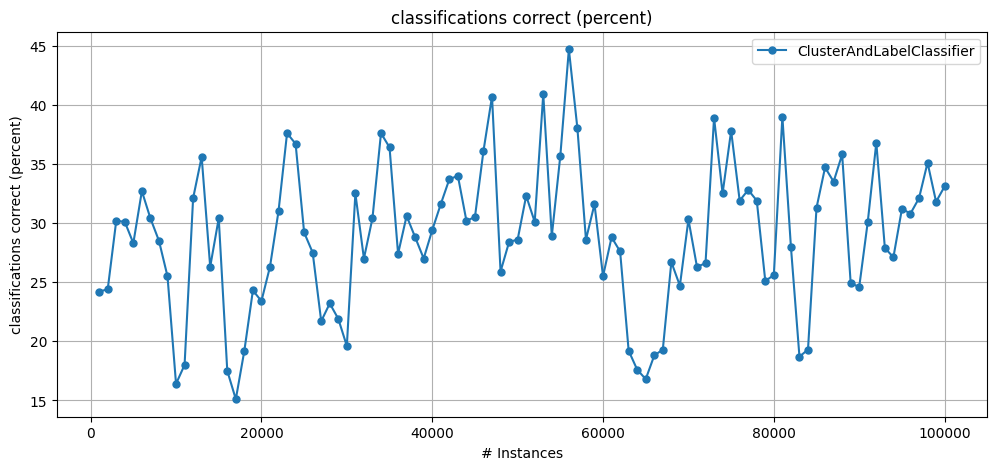

In [3]:
from moa.classifiers.semisupervised import ClusterAndLabelClassifier

# Create a ClusterAndLabel instances and configure it with 100 microclusters
cl_100 = MOAClassifierSSL(schema=stream.get_schema(), moa_learner=ClusterAndLabelClassifier(), CLI='-p -c (Clustream -k 100)')

results_cl_100 = prequential_SSL_evaluation(stream=stream, learner=cl_100, label_probability=0.01, window_size=1000)

# The results are stored in a dictionary. The cumulative and windowed objects provides access to the metrics, 
# while other metrics are available directly in the dictionary
display(results_cl_100)

print(results_cl_100['cumulative'].accuracy()) # Test-then-train accuracy, i.e. cumulatively, not windowed. 
display(results_cl_100['windowed'].metrics_per_window()) # A dataframe containing the windowed results. 

# Plotting over time (default: classifications correct (percent) i.e. accuracy)
plot_windowed_results(results_cl_100)

In [4]:
# Creating another cluster and label object. 
# The hyperparameters are defined via a command line passed to the object. See object.CLI_help()
cl_50 = MOAClassifierSSL(schema=stream.get_schema(), moa_learner=ClusterAndLabelClassifier(), CLI='-p -c (Clustream -k 50)')

results_cl_50 = prequential_SSL_evaluation(stream=stream, learner=cl_50, label_probability=0.01, window_size=1000)

display(results_cl_50)
print(results_cl_50['cumulative'].accuracy())
display(results_cl_50['windowed'].metrics_per_window())

{'learner': 'ClusterAndLabelClassifier',
 'cumulative': <capymoa.evaluation.evaluation.ClassificationEvaluator at 0x7f7941882e90>,
 'windowed': <capymoa.evaluation.evaluation.ClassificationWindowedEvaluator at 0x7f7941882140>,
 'wallclock': 10.912981271743774,
 'cpu_time': 8.987915995999998,
 'max_instances': -1,
 'stream': <capymoa.datasets.datasets.RBFm_100k at 0x7f797f1b6140>,
 'other_measurements': {'num_unlabeled_instances': 99015.0,
  'pseudo_label_accuracy': 0.25152,
  'num_correct_pseudo_labeled': 25152.0,
  'num_instances_tested': 100000.0}}

25.162000000000003


,classified instances,classifications correct (percent),Kappa Statistic (percent),Kappa Temporal Statistic (percent),Kappa M Statistic (percent),F1 Score (percent),F1 Score for class 0 (percent),F1 Score for class 1 (percent),F1 Score for class 2 (percent),F1 Score for class 3 (percent),...,Precision for class 1 (percent),Precision for class 2 (percent),Precision for class 3 (percent),Precision for class 4 (percent),Recall (percent),Recall for class 0 (percent),Recall for class 1 (percent),Recall for class 2 (percent),Recall for class 3 (percent),Recall for class 4 (percent)
0,1000.0,23.4,0.705175,1.033592,-11.499272,21.739660,37.121212,11.111111,10.000000,14.285714,...,35.483871,29.411765,13.675214,8.333333,21.257355,78.400000,6.586826,6.024096,14.953271,0.322581
1,2000.0,23.8,0.797655,1.677419,-12.058824,NaN,34.605598,NaN,15.311005,11.604096,...,NaN,53.333333,8.585859,29.613734,20.691303,55.060729,0.000000,8.938547,17.894737,21.562500
2,3000.0,23.6,2.834090,0.261097,-8.831909,NaN,27.931034,NaN,30.120482,24.022346,...,NaN,31.645570,16.666667,23.846154,24.836325,31.640625,0.000000,28.735632,43.000000,20.805369
3,4000.0,34.8,14.758985,13.984169,6.723891,31.525003,29.090909,33.613445,43.362832,4.878049,...,48.780488,36.704120,5.970149,38.285714,30.968438,27.586207,25.641026,52.972973,4.123711,44.518272
4,5000.0,27.4,8.292806,7.279693,0.274725,27.522922,27.145709,25.726141,34.693878,13.058419,...,41.891892,29.929577,9.895833,34.634146,26.336474,26.562500,18.562874,41.262136,19.191919,26.102941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96000.0,18.3,-1.835406,-6.518905,-16.547789,16.750675,18.271605,2.710027,15.420561,3.934426,...,2.450980,14.410480,2.941176,52.577320,15.069098,15.677966,3.030303,16.582915,5.940594,34.113712
96,97000.0,14.4,-6.627736,-9.323116,-20.224719,13.416944,7.569721,3.562341,1.993355,5.278592,...,3.225806,2.290076,3.688525,60.571429,11.777816,7.063197,3.977273,1.764706,9.278351,36.805556
97,98000.0,24.7,2.772470,4.076433,-6.506365,20.575830,25.581395,8.270677,21.025641,7.407407,...,11.578947,19.617225,6.504065,37.931034,20.834920,25.190840,6.432749,22.651934,8.602151,41.296928
98,99000.0,28.5,5.575658,7.741935,-3.025937,22.241187,23.177570,14.022140,28.009828,NaN,...,20.652174,25.791855,0.000000,40.054496,23.048065,25.941423,10.614525,30.645161,0.000000,48.039216


In [5]:
# Checking the possible hyperparameters for the object
print(cl_100.CLI_help())

-c clustream (default: Clustream)
Used to configure clustream
-p pseudoLabel
Using pseudo-label while training
-e debugMode
Print information about the clusters on stdout
-k kNearestCluster (default: 1)
Issue predictions based on the majority vote from k-nearest cluster



## Using a supervised learner in a SSL setting

* We can also train any MOA learner only on the labeled data and evaluate it on all of the data.



In [6]:
from moa.classifiers.meta import StreamingRandomPatches
from capymoa.learner import MOAClassifier

srp10 = MOAClassifier(schema=stream.get_schema(), moa_learner=StreamingRandomPatches(), CLI="-s 10")

results_srp10 = prequential_SSL_evaluation(stream=stream, learner=srp10, label_probability=0.01, window_size=1000)

display(results_srp10)
print(results_srp10['cumulative'].accuracy())
display(results_srp10['windowed'].metrics_per_window())

{'learner': 'StreamingRandomPatches',
 'cumulative': <capymoa.evaluation.evaluation.ClassificationEvaluator at 0x7f794181c8e0>,
 'windowed': <capymoa.evaluation.evaluation.ClassificationWindowedEvaluator at 0x7f794181c3d0>,
 'wallclock': 4.284528493881226,
 'cpu_time': 5.746431481999998,
 'max_instances': -1,
 'stream': <capymoa.datasets.datasets.RBFm_100k at 0x7f797f1b6140>,
 'other_measurements': {'num_unlabeled_instances': 99015.0,
  'pseudo_label_accuracy': 0.0,
  'num_correct_pseudo_labeled': 0.0,
  'num_instances_tested': 100000.0}}

35.150999999999996


,classified instances,classifications correct (percent),Kappa Statistic (percent),Kappa Temporal Statistic (percent),Kappa M Statistic (percent),F1 Score (percent),F1 Score for class 0 (percent),F1 Score for class 1 (percent),F1 Score for class 2 (percent),F1 Score for class 3 (percent),...,Precision for class 1 (percent),Precision for class 2 (percent),Precision for class 3 (percent),Precision for class 4 (percent),Recall (percent),Recall for class 0 (percent),Recall for class 1 (percent),Recall for class 2 (percent),Recall for class 3 (percent),Recall for class 4 (percent)
0,1000.0,27.2,2.967230,5.943152,-5.967977,NaN,41.434263,NaN,NaN,22.099448,...,NaN,NaN,27.027027,25.581395,23.217027,83.200000,0.000000,0.000000,18.691589,14.193548
1,2000.0,26.6,8.113434,5.290323,-7.941176,31.886506,25.255973,19.354839,28.668942,19.450317,...,26.966292,36.842105,12.169312,31.367292,27.704267,14.979757,15.094340,23.463687,48.421053,36.562500
2,3000.0,31.8,12.194419,10.966057,2.849003,34.203985,36.056338,9.326425,40.754717,15.025907,...,42.857143,59.340659,10.139860,32.206759,28.925891,25.000000,5.232558,31.034483,29.000000,54.362416
3,4000.0,37.9,14.069494,18.073879,11.158798,35.861064,40.325866,2.484472,42.148760,12.121212,...,40.000000,89.473684,22.857143,32.540862,29.557110,37.931034,1.282051,27.567568,8.247423,72.757475
4,5000.0,36.8,15.426614,19.284802,13.186813,38.724655,40.940526,17.272727,41.155235,12.962963,...,35.849057,80.281690,77.777778,34.250000,30.859601,57.812500,11.377246,27.669903,7.070707,50.367647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96000.0,49.9,34.633019,34.680574,28.530670,48.839355,43.973941,51.713396,56.797583,24.460432,...,53.205128,71.212121,44.736842,57.432432,45.686094,57.203390,50.303030,47.236181,16.831683,56.856187
96,97000.0,49.1,32.876613,34.993614,28.511236,47.242612,45.031056,43.692308,54.153846,20.168067,...,47.651007,56.774194,54.545455,58.528428,43.828797,53.903346,40.340909,51.764706,12.371134,60.763889
97,98000.0,44.4,25.665965,29.171975,21.357850,40.447628,44.804318,38.848921,36.933798,4.040404,...,50.467290,50.000000,33.333333,55.960265,36.809842,63.358779,31.578947,29.281768,2.150538,57.679181
98,99000.0,41.2,21.858596,24.129032,15.273775,34.761967,36.182336,37.762238,31.141869,NaN,...,50.467290,43.689320,0.000000,58.125000,33.656707,53.138075,30.167598,24.193548,0.000000,60.784314


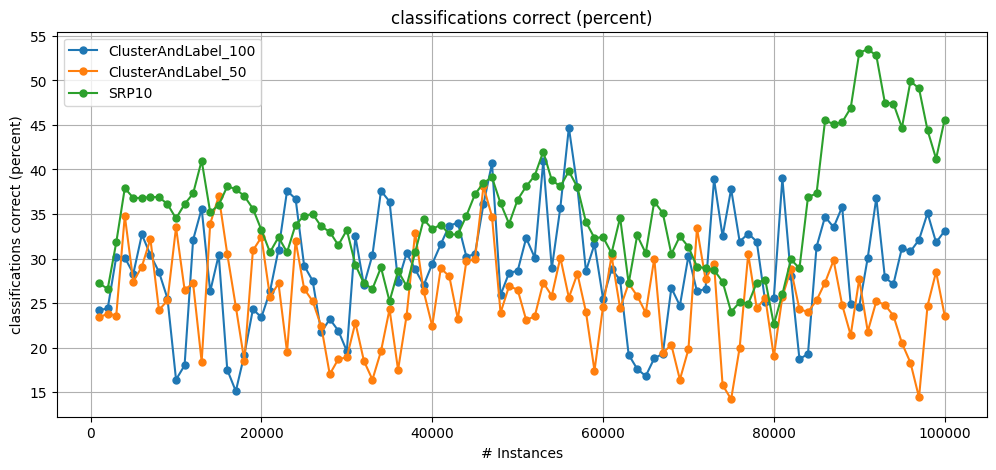

In [7]:
# Plotting all the results together
# Adding an experiment_id to the results dictionary allows controlling the legend of each learner. 
results_cl_100['experiment_id'] = 'ClusterAndLabel_100'
results_cl_50['experiment_id'] = 'ClusterAndLabel_50'
results_srp10['experiment_id'] = 'SRP10'

plot_windowed_results(results_cl_100, results_cl_50, results_srp10)